<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_DeepLearning/blob/main/4_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EA%B8%B0%EB%B0%98_%EC%BC%80%EB%9D%BC%EC%8A%A4%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9Cmnist%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연구목표

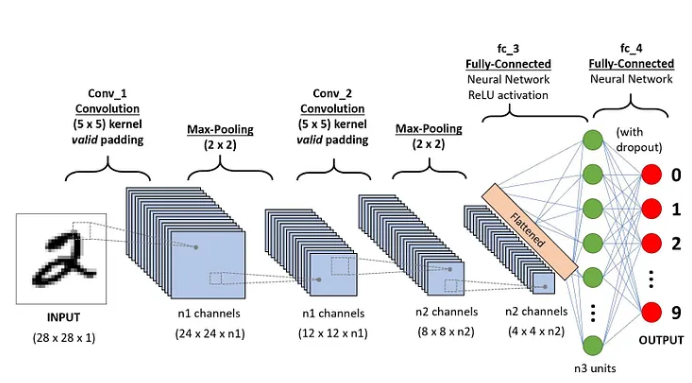

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/cnn/cnn_11.png')

- 목표
  - MNIST 데이터를 이용하여, 손글씨 숫자 이미지를 학습, 이를 잘 분류하는 모델 생성
- 방식
  - 인공신경망 사용, CNN 계열
- 예측결과
  - 이 이미지는 숫자 x (0~9) 입니다.
- 사용 프레임 웍
  - keras, 백엔드앤진은 tensorflow 2.x
  - 텐서플로우 개발 방식 3번 타입 keras로 개발
  - 세부적인 설계값만 부여, 나머지는 내부에서 처리
  - 필요시, 조기학습종료 진행
  - 필요시, GPU 학습 진행

- 최종산출물
  -
- 인공 시견망
  -  구조 및 shape는 그림과 다를 수 있음
  

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

# 통상 버전은 따라감
tf.__version__
# keras.__version__

'2.14.0'

In [ ]:
# 백엔드 엔진(딥러닝 프레임웍) 확인 -> 필요시 교체 가능함. ( 순수 케라스에서 진행)
keras.backend.backend()

'tensorflow'

# 데이터 수집/ 획득

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) =  mnist.load_data()
'''
  - feature
    - 훈련데이터 : (60000, 28, 28)
    - 테스트 데이터 : (10000, 28, 28)
  - label
    - (60000, )
    - (10000, )
'''

X_train.shape, y_train.shape, X_test.shape, y_test.shape


11490434/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 데이터 준비

In [ ]:
# 기본 타입 : 0 ~ 255 로 픽셀이 표현된것으로 추정 -> 고유값체크하면 나옴
type(X_train), type(X_test), X_train[:1,:1, :]

(numpy.ndarray,
 numpy.ndarray,
 array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0]]], dtype=uint8))

- 딥러닝 -> 데이터가 모두 수치화가 되어야한다! (인코딩)
- 필요하면 정규화 처리 수행
- 영상 데이터는 딥러닝 프레임웍에 따라 포멧조정

In [ ]:
# 포멧확인
fmt = keras.backend.image_data_format()
# channel_last => channel 데이터가 맨뒤에 배치
fmt
# (N, H, W, C)

'channels_last'

In [ ]:
# 정규화 처리만 진행
import numpy as np

np.max(X_train), np.min(y_train) # 0 <= x <= 255
np.max(X_test), np.min(y_test)

(255, 0)

In [ ]:
X_train =  X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

In [ ]:
np.max(X_train), np.min(X_train)

(1.0, 0.0)

# 데이터 분석

# 모델 구축(딥러닝)


#### 훈련/ 신경망구성 에 필요한 상수 정의

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
import numpy as np

In [ ]:
# 원본 이미지 (비정형데이터) => 데이터
PIXEL_H           =  X_train.shape[1]  # 28 원본이미지의 높이
PIXEL_W           =  X_train.shape[2]  # 28 원본이미지의 너비
PIXEL_S           =  PIXEL_H * PIXEL_W  # 28 * 28 = 784   . 원본 이미지의 총 피처수
LABEL_NUM         =  len(np.unique(y_train))# 10  정답의 개수
INPUT_CHANNEL     =  1 # 1  원본 이미지의 채널수

## 피처엔지니어링
  - 포멧에 맞게 shape 변경


In [ ]:
if fmt == 'channels_last':  # NHWC
  # x_train, x_test => (60000, 28, 28) -> (60000, 28, 28, 1), x_test ....
  X_train = X_train.reshape(-1, PIXEL_H, PIXEL_W, INPUT_CHANNEL)
  X_test= X_test.reshape(-1, PIXEL_H, PIXEL_W, INPUT_CHANNEL)
  input_shape = ( PIXEL_H, PIXEL_W, INPUT_CHANNEL)
else: # NCHW
  X_train = X_train.reshape(-1, INPUT_CHANNEL,  PIXEL_H, PIXEL_W)
  X_test= X_test.reshape(-1, INPUT_CHANNEL,  PIXEL_H, PIXEL_W)
  input_shape = ( INPUT_CHANNEL, PIXEL_H, PIXEL_W)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- 정답 쪽 인코딩 체크
    - 0 ~ 9 : 인접한 값이 가깝게 느끼는 문제 있을수 있다 -> 해결 -> 원핫인코딩 처리

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# 원-핫 인코딩
'''
    - 이득 : 수치간 영향력을 제외
    - 단점 : 피처수가 증가 -> 학습 비용 상승 문제(미비)
'''
# keras.utils.to_categorical( y_train, LABEL_NUM)[0]
y_train = keras.utils.to_categorical( y_train, LABEL_NUM)
y_test = keras.utils.to_categorical( y_test, LABEL_NUM)

y_train.shape, y_test.shape



((60000, 10), (10000, 10))

## 인공신경망 구성(CNN기반)

In [ ]:
'''
신경망 구성
- 입력층
- 은닉층
  - 합성곱층 1f   : 1채널 -> 32채널로 확장 (설정), same옵션으로 패딩 -> 28
  - 풀링층  1f    : 이미지크기를 절반 축소 (28-> 14)
  - 드롭아웃층    :

  - 합성곱층 2f   : 32채널 -> 64채널로 확장 (설정)
  - 풀링층  2f    : 이미지크기를 절반 축소 (14  -> 7)
  - 드롭아웃층

  - 전결합층      : 4D -> 2D: 1024 -> 10개의 피처로 수렴(설정)
  - 드롭아웃층

- 출력층
'''

'\n신경망 구성\n- 입력층\n- 은닉층\n  - 합성곱층 1f   : 1채널 -> 32채널로 확장 (설정), same옵션으로 패딩 -> 28\n  - 풀링층  1f    : 이미지크기를 절반 축소 (28-> 14)\n  - 드롭아웃층    : \n\n  - 합성곱층 2f   : 32채널 -> 64채널로 확장 (설정)\n  - 풀링층  2f    : 이미지크기를 절반 축소 (14  -> 7)\n  - 드롭아웃층\n\n  - 전결합층      : 4D -> 2D: 1024 -> 10개의 피처로 수렴(설정)\n  - 드롭아웃층\n\n- 출력층\n'

- Shpae 형태
'''
    - input
      (None, 28, 28, 1 )
    - conv 1f, same padding (None, 28, 28, 32 )
    - pool 1f(None, 14, 14, 32 )
    - conv 2f(None, 14, 14, 64 )
    - pool 2f (None, 7, 7, 64 )
      (none, 3136)
    - flatten
      (none, 1024)
    - output
      (none, 10)
'''

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model

In [ ]:
'''
layers.Conv2D() 주요 파라미터
def __init__(
 filters,              # 출력 채널수 지정, 원본이미지가 합성곱을 통과하면 출력채널수 만큼 데이터 증가 설정 32
 kernel_size            # 커널(필터)의 크기를 설정, 정방형, (5,5) 설정
                        # k
 strides=(1, 1)         # 커널이 원본 이미지를 슬라이딩 하면서 합성곱을 수행할때 이동량(좌우, 상하) 통상 같은 사이즈로 제시
                        # 설정(1,1) -> 한칸씩 이동
 padding='same'         # k가 경계선 지점에 도달을 못할수도 있다. -> 보정
                        # same : 원본과 동일한 크기로 feature map이 출력되도록 조정
                        # valid : 가용가능한 지점까지만 feature map이 출력되도록 조정
,data_format=None       # channels_last or channels_first
 activation=None,       # relu 설정
use_bias=True,          # 편향값 사용 여부
   kernel_initializer='glorot_uniform'  # 커널이 파라미터로 가지고 있는 w의 초기값
input_shape             # 튜플, shape값을 가진다.

'''

model.add(layers.Conv2D(
    filters= 32,
    kernel_size = (5, 5),
    strides= (1, 1),
    padding='same',
    activation = 'relu',    # 출력 결과는 activation map이다, x<0 => 0, x>0 => x
    use_bias    = True,
    input_shape = input_shape

                        ) ) # conv 1f, input

In [ ]:
'''
    layers.MaxPool2D() 주요파라미터
    - pool_size=(2, 2) # 커널의 크기
    - strides = None   # 커널의 이동량, None 이면, pool_size 와 동일
    - padding = 'valid' # 상동
'''

model.add(layers.MaxPool2D(
    pool_size = (2,2),
    strides = None,
    padding = 'same'

)) # pool 1f

In [ ]:
model.add(layers.Dropout(0.1)) # dropout, 0.1비율로 학습방해 (과적합 방지)
model.add(layers.Conv2D(32*2 , (5,5), padding='same', activation='relu')) # conv 2f
model.add(layers.MaxPool2D(padding='same') ) # pool 2f

model.add(layers.Dropout(0.1)) # dropout
model.add(layers.Flatten()) # flatten 4D -> 2D
model.add(layers.Dense(1024, activation='relu')) # 전결합층 1024
model.add(layers.Dropout(0.1)) # dropout
model.add(layers.Dense(10, activation='softmax')) # output

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

- 파라미터 (w or b)수 계산해보기
  - y = wx + b
  - 832 = (32x(5x5)) +32  
  - 51264 = (64x(5x5)x32 ) + 64     ## 출력채널수 : 32
  - 3212288 = 1024x( 3136 ) + 1024  ## flatten
  - 10250 = 10x(1024x1)+ 10

### 컴파일 환경 구성
- 최적화 도구
- 손실값(함수)
- 평가도구(지표), 모델성능

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],)

## 학습

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
# 학습 환경변수 설정
EPOCH = 10  # 설정 10세대 학습
BATCH_SIZE = 128  # 미니 배치 학습, 1회 학습 수행시 데이터량
IS_GPU = True    # F : CPU




In [ ]:
# 콜백용
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
def training():
    '''
     - x=None, y=None # 피처데이터, 정답데이터
     - batch_size=None # 1회 학습시 데이터량
     - epochs=1 # 전체- 데이터를 풀로 사용하는 횟수
     - verbose='auto' # 로그 출력
     - callbacks=None # 콜백등록
     - validation_split=0.0, # 검증용 데이터 비용
    '''
    my_callbacks = [
        # 조기 학습 종료
        # 조기학습종료 이벤트 발동후 2회더 진행=> 변화 없으면 종료
        EarlyStopping(patience=2),
        # 모델 저장
        ModelCheckpoint(filepath='model.{epoch}-{val_loss:2f}.h5'),
        # 텐서보드용 데이터 저장용 -> 텐서플로우 기반 모델의 시각화 성능테스트등등
        TensorBoard(log_dir='./logs')
    ]
    return model.fit( X_train, y_train,
                      batch_size       = BATCH_SIZE,
                      epochs           = EPOCH,
                      validation_split = 0.2, # 20%를 검증용으로 사용
                      # 학습중 특정 이벤트가 발생하면 작동하는 콜백함수 등록
                      callbacks        = my_callbacks
    )
    pass


In [ ]:
%%time
if not IS_GPU: # cpu
    history = training()
else: # gpu
    with tf.device('/device:GPU:0'):
        history = training()

Epoch 1/10
375/375 [==============================] - 16s 11ms/step - loss: 0.1724 - accuracy: 0.9464 - val_loss: 0.0619 - val_accuracy: 0.9808
Epoch 2/10
  1/375 [..............................] - ETA: 3s - loss: 0.0854 - accuracy: 0.9766

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 4s 11ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0385 - val_accuracy: 0.9897
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0436 - val_accuracy: 0.9877
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0265 - accuracy: 0.9911 - val_loss: 0.0358 - val_accuracy: 0.9896
Epoch 5/10
375/375 [==============================] - 5s 15ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0318 - val_accuracy: 0.9912
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0379 - val_accuracy: 0.9887
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0354 - val_accuracy: 0.9903
CPU times: user 27.5 s, sys: 2.47 s, total: 29.9 s
Wall time: 40.3 s


### 테스트 데이터 예측

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0290 - accuracy: 0.9909


[0.028997158631682396, 0.9908999800682068]

## 시스템 통합/산출물/배포

In [ ]:
# 저장
model.save('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/mnist_clf_keras.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 로드
loaded_model = models.load_model('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/mnist_clf_keras.h5')

In [ ]:
# 예측수행
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0290 - accuracy: 0.9909


[0.028997158631682396, 0.9908999800682068]

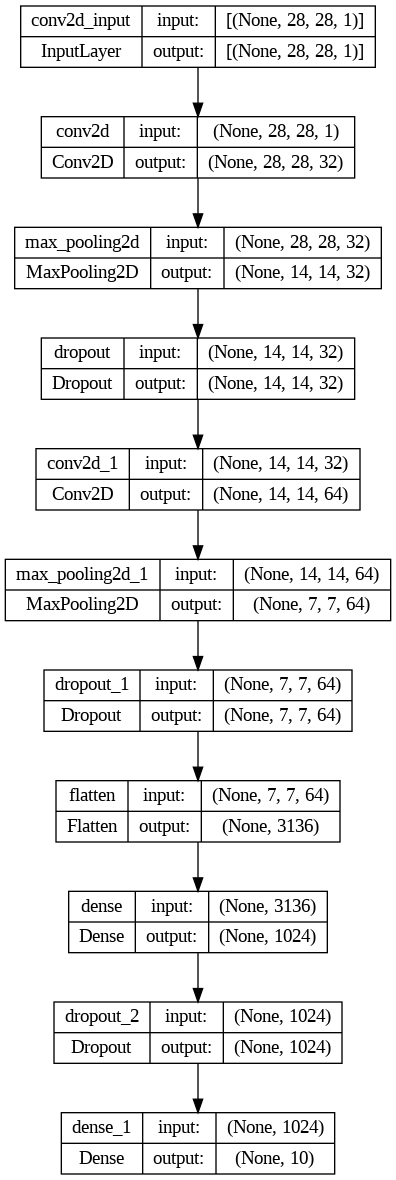

In [ ]:
# 모델 정보 시각화
keras.utils.plot_model(loaded_model, to_file='model.png',
                       show_shapes=True, show_layer_names=True)

In [ ]:
# 가중치만 저장
model.save_weights('mnist_cnn.weight')